En primer lugar, se implementan las librerias genericas que se utilizan

In [1]:
import numpy as np
from scipy import optimize as opt

import os
print(os.getcwd())

c:\Users\pablo\Documents\GitHub\Trabajo-MNP


A continuacion, se importa el codigo creado

In [2]:
from src import Airplane

Creacion del objeto del ala

In [3]:
pedro = Airplane(1000, 15)

La funcion `lift_difference` permite calcular la diferencia entre el lift que genera el ala y la fuerza generada en valor absoluto. Cuanto mayor sea este valor, mas proporcion de fuerza hacia abajo se esta realizando y, por tanto, menos eficiente es el ala, pues está gastando energia en generar fuerza hacia abajo en lugar de hacia arriba.

In [27]:
def lift_difference(a):
    return abs((pedro.lift_poli(a) - pedro.abs_lift(a))/(pedro.abs_lift(a)+1))

Por ejemplo, en caso de utilizar el polinomio x^2 + 2x, se obtiene lo siguiente:

In [29]:
print(lift_difference([1, 2]))

0.04294156977359735


En la optimizacion, se pueden controlar principalmente los siguientes parametros

In [ ]:
grado = 4 # Gradio del polinonio g(x) en la funcion f(x) = sqrt(1-x^2) * g(x)

lift = pedro.weight/2 # [N] Fuerza de sustentacion objetivo en el ala (la mitad del peso del avion)
lift_tol = 0.1 # Tolerancia de la fuerza de sustentacion

negative_lift_tol = 0.1 # Tolerancia de la fuerza de sustentacion negativa

In [43]:
# Funcion objetivo, minimizar el momento de la fuerza de sustentacion
def objective(a):
    return abs(pedro.moment_poli(a))

# Se restringe la fuerza de sustentacion a un rango de tolerancia
lift_target = opt.NonlinearConstraint(lambda a: pedro.lift_poli(a), lift*(1-lift_tol), lift*(1+lift_tol))

# Se restringe la cantidad de fuerza de sustentacion negativa a un rango de tolerancia
negative_lift = opt.NonlinearConstraint(lift_difference, 0, negative_lift_tol)


a0 = np.zeros(grado)
print(f"Coeficientes inciales: {a0}")
print("-------------------------")

res = opt.minimize(objective, a0, method='SLSQP', constraints=[lift_target, negative_lift], options={'disp': True})

res = res.x
print("-------------------------")
print(f"Coeficientes finales: {res}")


Coeficientes inciales: [0. 0. 0. 0.]
-------------------------
Iteration limit reached    (Exit mode 9)
            Current function value: 19200.219026689116
            Iterations: 100
            Function evaluations: 561
            Gradient evaluations: 99
-------------------------
Coeficientes finales: [  -865.86294499  12628.06055571 -30196.35355323  19710.08000239]


Finalmente, se muestra el lift obtenido, el momento en la raiz, la grafica del lift en funcion de la posicion y el momento en la raiz

Lift total obtenido: 8829.092942436295 N
Momento en la raiz: 19200.219026689116 N*m


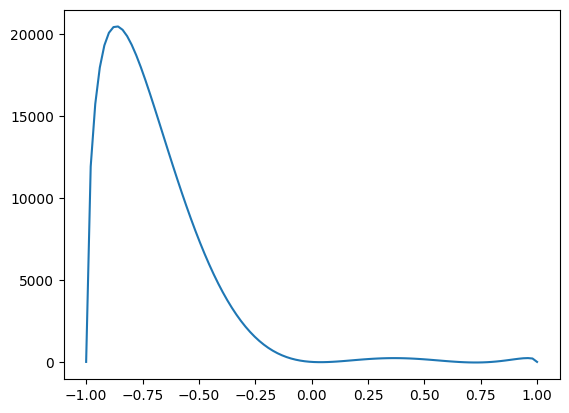

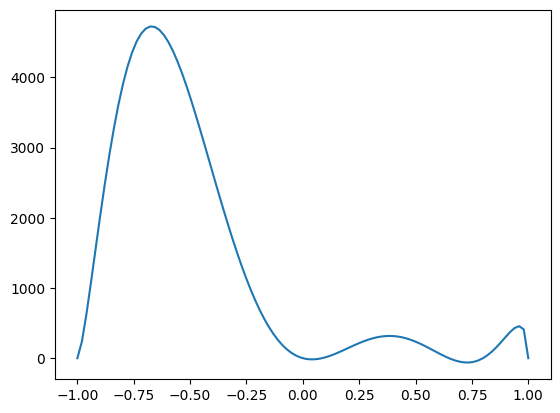

In [45]:
print(f"Lift total obtenido: {pedro.lift_poli(res)} N")
print(f"Momento en la raiz: {pedro.moment_poli(res)} N*m")


pedro.plot_lift(res)
pedro.plot_moment(res)

Ejemplo de como se llama a una funcion de fortran para calcular los nodos de chebyshev

In [12]:
from src import chebyshev_nodes
from time import time
import numpy as np
import math

In [13]:
ejecuciones = 6000000

In [14]:
t0 = time()
chebyshev_nodes(ejecuciones)
print("Tiempo de ejecución: ", time()-t0)

Tiempo de ejecución:  0.20910930633544922


Aqui se ve que usando operaciones vectoriales es muchisimo mas rapido, que es lo que se deberia utilizar en fortran

In [22]:
def chebyshev_nodes(n):
    """
    Cálculo de los nodos y pesos de Chebyshev.
    
    :param n: número de nodos
    :return: (x, w) tupla de dos arrays de longitud n
             x -> nodos de Chebyshev
             w -> pesos (constantes en este caso)
    """
    # Generamos un array con valores i = 1, 2, ..., n
    i = np.arange(1, n + 1)

    # Cálculo de los nodos x(i) = cos( (2*i - 1)*pi / (2*n) )
    x = np.cos((2.0 * i - 1.0) * np.pi / (2.0 * n))

    # Cálculo de los pesos w(i) = pi / n (constante)
    w = np.full(n, np.pi / n)  # Crea un array de tamaño n con el mismo valor

    return x, w

# Ejemplo de uso
if __name__ == "__main__":
    t0 = time()
    x, w = chebyshev_nodes(ejecuciones)
    print("Tiempo de ejecución: ", time()-t0)



Tiempo de ejecución:  0.07134032249450684


Usando un bucle de Python y la libreria math (hecha en C), se ve que es extremadamente lento

In [10]:


def chebyshev_nodes(n):
    """
    Cálculo de los nodos y pesos de Chebyshev (versión sin NumPy).
    
    :param n: número de nodos
    :return: (x, w) tupla de dos listas de longitud n
             x -> nodos de Chebyshev
             w -> pesos (constantes en este caso)
    """
    x = []
    w = []
    
    for i in range(1, n + 1):
        # x(i) = cos((2*i - 1)*pi / (2*n))
        x_val = math.cos((2.0 * i - 1.0) * math.pi / (2.0 * n))
        x.append(x_val)
        
        # w(i) = pi / n
        w_val = math.pi / n
        w.append(w_val)
    
    return x, w

# Ejemplo de uso
if __name__ == "__main__":
    t0 = time()
    x, w = chebyshev_nodes(ejecuciones)
    print("Tiempo de ejecución: ", time()-t0)


Tiempo de ejecución:  0.7969439029693604
